### web crawling
- 1. requests : json : 동적페이지(URL 변경 없이 데이터를 수정 및 추가)
- 2. requests : html : 정적페이지(URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1,2번 방법을 사용하지 못할때 사용

#### 크롤링 절차
- 1. 웹 서비스 분석 : URL 확인
- 2. requests, response : json 데이터(문자열)를 얻기
- 3. json 데이터(문자열) -> dict(파싱) -> 데이터프레임

In [8]:
import pandas as pd

In [9]:
import requests

- 모바일 네이버증권 페이지 : m.stock.naver.com 
- 개발자도구 열기 : f12
    - Network > XHR > Headers : user-agent 확인  
    ```  
    user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36
    ```  
    - Network > XHR > Headers > General : URL복사  
    ```  
    https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=9
    ```  
    

In [10]:
# 1. 웹서비스 분석 : URL 찾기
code, page_size, page="KOSPI", 20, 1


url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)

print(url)


### 이 부분이 가장 중요하고 어려운 부분!!

https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1


In [11]:
# 2. request, response : JSON(str)
response = requests.get(url)
response

<Response [200]>

In [12]:
# 3. JSON(str) -> JSON(dict) -> DF

datas = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
18,KOSPI,-0.95,-23.01,20200921,2427.17,2379.38,2389.39,2412.44
19,KOSPI,0.26,6.23,20200918,2417.81,2396.33,2412.40,2413.53


In [13]:
# 함수로 만들기
def get_stock_data(code, page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    datas = response.json()["result"]["siseList"]
    return pd.DataFrame(datas)

In [16]:
kosdaq_df = get_stock_data("KOSDAQ", 100)
kosdaq_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
98,KOSDAQ,0.70,4.93,20200529,714.51,700.84,713.68,706.16
99,KOSDAQ,-2.19,-15.84,20200528,728.80,695.30,708.75,728.76


In [17]:
kospi_df = get_stock_data("KOSPI", 100)
kospi_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
98,KOSPI,0.05,1.06,20200529,2038.89,2006.62,2029.60,2018.37
99,KOSPI,-0.13,-2.66,20200528,2054.52,2003.75,2028.54,2047.08


#### USD 수집

In [36]:
# 1. 웹페이지 분석 : URL

code, page_size, page = "FX_USDKRW", 100, 1

url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)

print(url)

https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=100&page=1


In [37]:
# 2. request, response : JSON(str)

# 쿠키 데이터 추가해서 요청


params = {
    "cookie" : "cookie: NNB=HDDBKUOPZE2F6; _ga=GA1.2.2040106433.1597380333; NRTK=ag#20s_gr#4_ma#-2_si#-2_en#-2_sp#-2; NID_AUT=/5q1ofKUJMquVlG+NUh5nwnIrRcJk+aU8EQtEYiyMrBlBGE37ScgOD50Ci6OIK1B; NID_JKL=S4gRjOZaqXZI9ecbEbClE06olkoAHCJPV5JjDuuA9zU=; _fbp=fb.1.1599297018243.707383414; ASID=d3d54e540000017485a8fe890000004c; nx_ssl=2; page_uid=UG+QVwp0Jy0ss4ohCFossssssSR-392855; NID_SES=AAABnGV2G6DW1GqivPNkYtbyAdT8cIvzA0QjmogieT5qt8k8+dY23fR2fV8kp4jtJ703EofetHk8HaSQZVFTEmoV8VNdDi6vQW0xAmxtOtkFFq5WsMpDZ0VGp06qkovwBoM9eYC7UGXNrQVHFQibY7A2V+B0ogF76wpAJtFhK3JA4cd7mYdSr8w4jFrIcnUfRk19XcaovL4xHkDdofJtAqrOODu56zjk8KgtrFyY+k8QxE0JmNeOOZslRkAZFvhYrV7JbQ31uNFU3EpXrtzw0BTO+pMFMJEIEyWmVCFsmzezCsWUA1IRHbZe1KixMjwSx0P3tUllQRGTNNK0zczelfeGj3tlE67TBUtHT7tjVFVViy32VCdMTPDKMq7V4Id2WrzSCclgevEDApgpIo/UxIDlmHsjPLE6z9BsIB1sbY2jreQqNeH6RbqV0yyqjISV8VhU4gHhAlBkbkJR0/I8M/yVtseVspg6kP2+jljzAgLJcd95OCSHWbmGjVMotxYhUdrX8nfc4KSkrtGQYq7vVVyCWwQCS4+11KKbzmsaVzpEtBha; JSESSIONID=C92E183A0B7EDEDB183A298E6E06D847; BMR=; XSRF-TOKEN=9955b189-71b1-468b-b5b9-5490d23105ef"
}



response = requests.get(url, headers=params)
response

<Response [200]>

In [38]:
response.text

'{"result":{"marketIndexDay":[{"dt":"20201021","nv":1133.0,"cv":-6.0,"cr":-0.53,"cbv":1152.82,"csv":1113.18,"sv":1144.1,"rv":1121.9},{"dt":"20201020","nv":1139.0,"cv":-1.0,"cr":-0.09,"cbv":1158.93,"csv":1119.07,"sv":1150.1,"rv":1127.9},{"dt":"20201019","nv":1140.0,"cv":-6.0,"cr":-0.52,"cbv":1159.95,"csv":1120.05,"sv":1151.1,"rv":1128.9},{"dt":"20201016","nv":1146.0,"cv":-1.5,"cr":-0.13,"cbv":1166.05,"csv":1125.95,"sv":1157.2,"rv":1134.8},{"dt":"20201015","nv":1147.5,"cv":1.0,"cr":0.09,"cbv":1167.58,"csv":1127.42,"sv":1158.7,"rv":1136.3},{"dt":"20201014","nv":1146.5,"cv":0.5,"cr":0.04,"cbv":1166.56,"csv":1126.44,"sv":1157.7,"rv":1135.3},{"dt":"20201013","nv":1146.0,"cv":-4.0,"cr":-0.35,"cbv":1166.05,"csv":1125.95,"sv":1157.2,"rv":1134.8},{"dt":"20201012","nv":1150.0,"cv":-2.5,"cr":-0.22,"cbv":1170.12,"csv":1129.88,"sv":1161.2,"rv":1138.8},{"dt":"20201008","nv":1152.5,"cv":-6.0,"cr":-0.52,"cbv":1172.66,"csv":1132.34,"sv":1163.7,"rv":1141.3},{"dt":"20201007","nv":1158.5,"cv":-3.0,"cr":-0.

In [39]:
# 3. JSON(str) -> DF

datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)


In [41]:
print(usd_df["dt"].values)

['20201021' '20201020' '20201019' '20201016' '20201015' '20201014'
 '20201013' '20201012' '20201008' '20201007' '20201006' '20201005'
 '20200929' '20200928' '20200925' '20200924' '20200923' '20200922'
 '20200921' '20200918' '20200917' '20200916' '20200915' '20200914'
 '20200911' '20200910' '20200909' '20200908' '20200907' '20200904'
 '20200903' '20200902' '20200901' '20200831' '20200828' '20200827'
 '20200826' '20200825' '20200824' '20200821' '20200820' '20200819'
 '20200818' '20200814' '20200813' '20200812' '20200811' '20200810'
 '20200807' '20200806' '20200805' '20200804' '20200803' '20200731'
 '20200730' '20200729' '20200728' '20200727' '20200724' '20200723'
 '20200722' '20200721' '20200720' '20200717' '20200716' '20200715'
 '20200714' '20200713' '20200710' '20200709' '20200708' '20200707'
 '20200706' '20200703' '20200702' '20200701' '20200630' '20200629'
 '20200626' '20200625' '20200624' '20200623' '20200622' '20200619'
 '20200618' '20200617' '20200616' '20200615' '20200612' '20200

In [42]:
print(kospi_df["dt"].values)

['20201021' '20201020' '20201019' '20201016' '20201015' '20201014'
 '20201013' '20201012' '20201008' '20201007' '20201006' '20201005'
 '20200929' '20200928' '20200925' '20200924' '20200923' '20200922'
 '20200921' '20200918' '20200917' '20200916' '20200915' '20200914'
 '20200911' '20200910' '20200909' '20200908' '20200907' '20200904'
 '20200903' '20200902' '20200901' '20200831' '20200828' '20200827'
 '20200826' '20200825' '20200824' '20200821' '20200820' '20200819'
 '20200818' '20200814' '20200813' '20200812' '20200811' '20200810'
 '20200807' '20200806' '20200805' '20200804' '20200803' '20200731'
 '20200730' '20200729' '20200728' '20200727' '20200724' '20200723'
 '20200722' '20200721' '20200720' '20200717' '20200716' '20200715'
 '20200714' '20200713' '20200710' '20200709' '20200708' '20200707'
 '20200706' '20200703' '20200702' '20200701' '20200630' '20200629'
 '20200626' '20200625' '20200624' '20200623' '20200622' '20200619'
 '20200618' '20200617' '20200616' '20200615' '20200612' '20200

In [43]:
# 데이터 합치기

In [49]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, left_on="dt", right_on="dt")
merge_df_1 = merge_df_1.rename(columns={"ncv_x":"ncv_kospi", "ncv_y":"ncv_kosdaq"})
merge_df_1 = merge_df_1[["dt", "ncv_kospi", "ncv_kosdaq"]]
merge_df_1.tail(2)

,dt,ncv_kospi,ncv_kosdaq
98,20200529,2029.60,713.68
99,20200528,2028.54,708.75


In [51]:
### inner join -> 중복되지않는데이터는 제거, 중복되는 데이터만 잔존

merge_df = pd.merge(merge_df_1, usd_df)[["dt", "ncv_kospi", "ncv_kosdaq", "nv"]]
merge_df.tail(2)

,dt,ncv_kospi,ncv_kosdaq,nv
98,20200529,2029.60,713.68,1238.0
99,20200528,2028.54,708.75,1240.0


### 그래프 그리기

In [56]:
import matplotlib.pylab as plt

In [57]:
%matplotlib inline

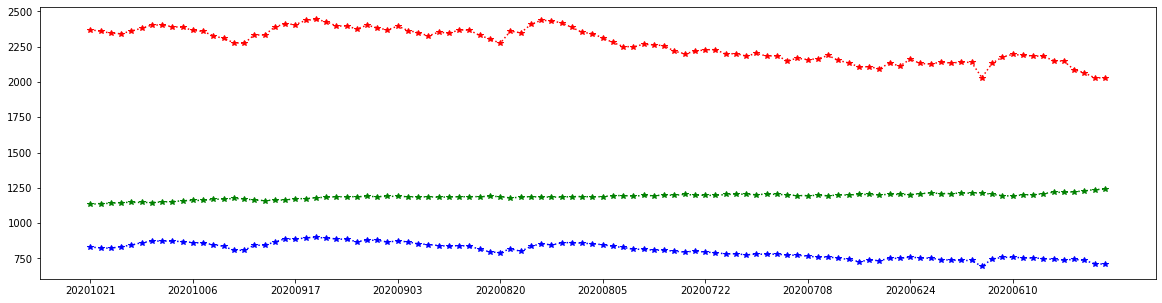

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(merge_df["dt"], merge_df["ncv_kospi"], "r*:", label="kospi")
plt.plot(merge_df["dt"], merge_df["ncv_kosdaq"], "b*:", label="kosdaq")
plt.plot(merge_df["dt"], merge_df["nv"], "g*:", label="usd")

# xtick이 항상 10개 출력되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]["dt"])  ### 10로 나누고, 10-1칸씩 띄워서 그려줌.

plt.show()

#### 정규화 : Normalization
- z = (x - min(x)) / (max(x) - min(x))


In [70]:
from sklearn import preprocessing

In [71]:
preprocessing.minmax_scale(merge_df["ncv_kospi"])[:10]


array([0.82478797, 0.79479086, 0.76667309, 0.75412008, 0.8015372 ,
       0.84796646, 0.9025877 , 0.90398516, 0.87562645, 0.86353123])

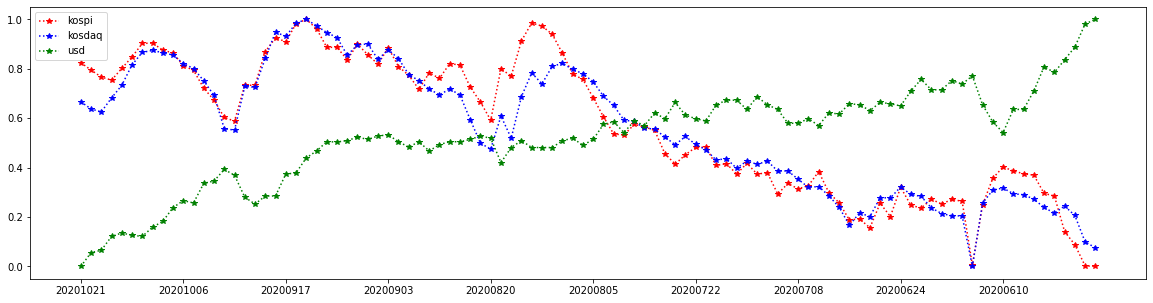

In [74]:
plt.figure(figsize=(20, 5))

plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kospi"]), "r*:", label="kospi")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kosdaq"]), "b*:", label="kosdaq")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["nv"]), "g*:", label="usd")


plt.legend(loc=0)   ### 라벨 데이터


# xtick이 항상 10개 출력되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]["dt"]) 

plt.show()

In [75]:
# 상관계수

In [76]:
import numpy as np

In [80]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["ncv_kosdaq"])[0, 1]

0.9594306670791254

In [81]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["nv"])[0, 1]

-0.763620329319802

In [82]:
np.corrcoef(merge_df["ncv_kosdaq"], merge_df["nv"])[0, 1]

-0.7129009053144418